In [1]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButton
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

## Explore image data

In [2]:
image_path = './dataset/CKD_01/T2.nii.gz'
image_obj = nib.load(image_path)
print(f'Type of the image {type(image_obj)}')

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


In [3]:
# Extract data as numpy array
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [4]:
# Get the image shape
height, width, depth = image_data.shape
print(f"Image height : {height}")
print(f"Image width : {width}")
print(f"Image depth : {depth}")


Image height : 240
Image width : 240
Image depth : 14


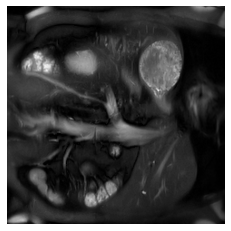

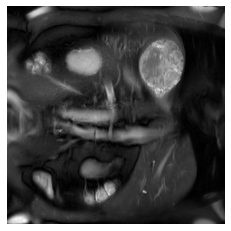

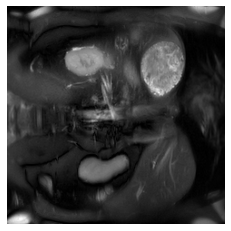

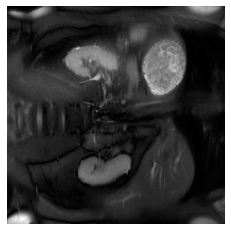

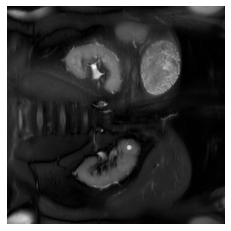

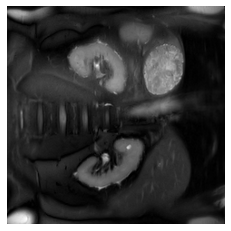

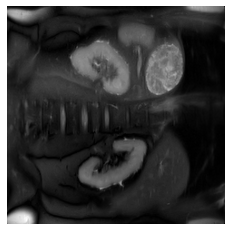

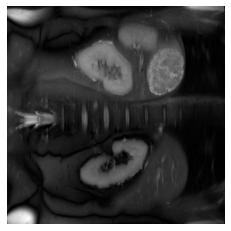

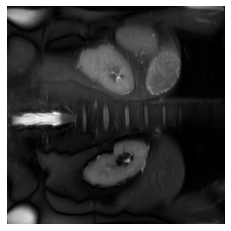

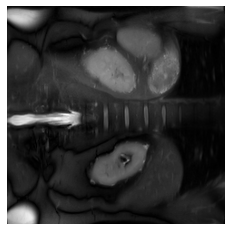

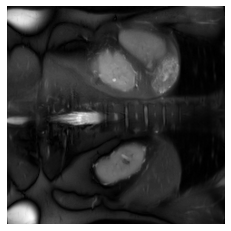

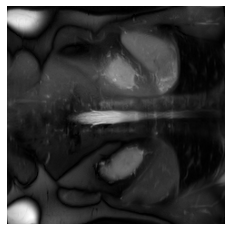

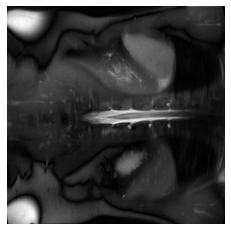

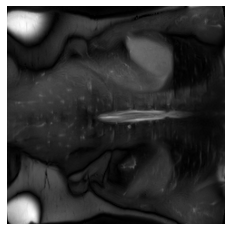

In [5]:
# Visualize Single Image Data

for i in range(depth):
    plt.imshow(image_data[:,:,i],cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
def explore_3d_image(layer):

    plt.figure(figsize=(5,10))
    plt.imshow(image_data[:,:,layer],cmap='gray')
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,image_data.shape[2]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>

## Explore data labels

In [7]:
label_path = './dataset/CKD_01/T2_mask.nii.gz'
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

In [8]:
# Label data as numpy array
label_data = label_obj.get_fdata()
type(label_data)


numpy.ndarray

In [9]:
# Get the label image shape
height, width, depth = label_data.shape
print(f"Image height : {height}")
print(f"Image width : {width}")
print(f"Image depth : {depth}")


Image height : 240
Image width : 240
Image depth : 14


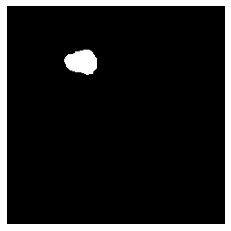

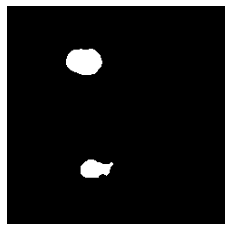

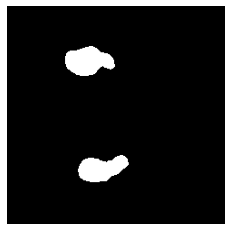

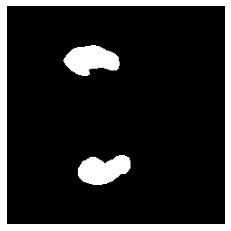

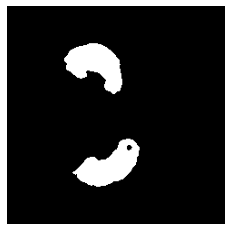

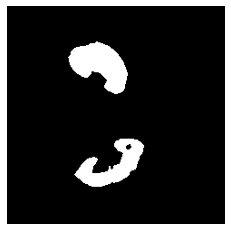

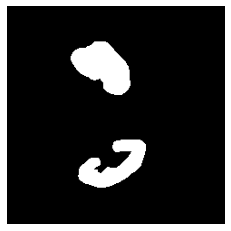

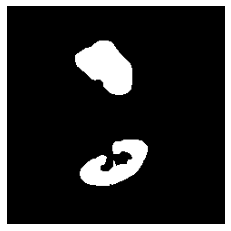

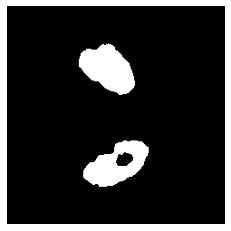

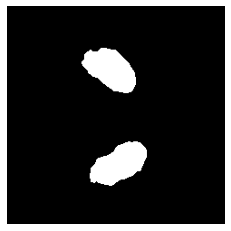

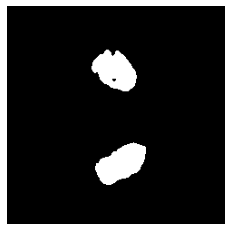

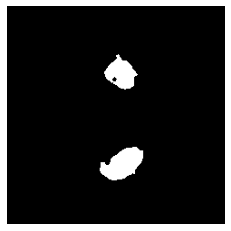

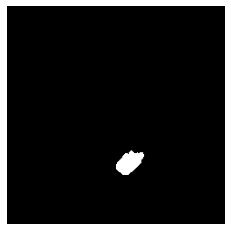

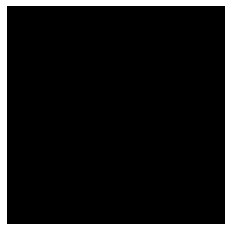

In [10]:
# Visualize Single Image Data

for i in range(depth):
    plt.imshow(label_data[:,:,i],cmap='gray')
    plt.axis('off')
    plt.show()

In [11]:
def explore_3d_image(layer):
    
    plt.figure(figsize=(5,10))
    plt.imshow(label_data[:,:,layer],cmap='gray')
    plt.title('Explore Layers of Kidney MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,label_data.shape[2]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>

## Mask and Image

In [12]:
def explore_3d_image(layer):
    
    plt.figure(figsize=(5,10))
    plt.imshow(image_data[:,:,layer],cmap='gray')
    plt.imshow(label_data[:,:,layer], alpha=0.3)
    plt.title('Explore Segmented MRI')
    plt.axis('off')
    return layer

interact(explore_3d_image, layer=(0,label_data.shape[2]-1))

interactive(children=(IntSlider(value=6, description='layer', max=13), Output()), _dom_classes=('widget-intera…

<function __main__.explore_3d_image(layer)>